# Simple Geometry: General properties

In [1]:
#!/usr/bin/python

import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ipywidgets import interact

import library.Sphere_models as sph
import library.Cylinder_models as cyl

def normalize(x,ra,rb):
    return (x-rb)/(ra-rb)
    
fs = 7 #figure size

## Angle dependence of the scattering amplitude

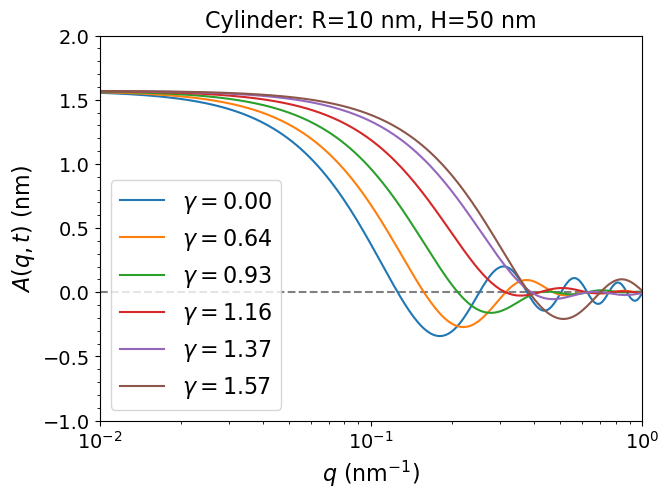

In [2]:
q = np.logspace(-3,1, num=500, endpoint=True, base=10.0)

Dr=1e-4
R = 10
H = 50

# Initialize plot
fig, axs = plt.subplots(1,1,figsize=(fs*1,5))

# Panel B: 1D form factor
axs.set_xlabel('$q$ (nm$^{-1}$)', fontsize=16)
axs.set_ylabel('$A(q,t)$ (nm)', fontsize=16)
axs.set_xscale('log')
axs.set_title('Cylinder: R=10 nm, H=50 nm',fontsize=16)
axs.minorticks_on()
axs.tick_params(axis='both', which='major', labelsize=14)
axs.axhline(y=0, ls='--', color='gray')
axs.set(xlim=(0.01,1), ylim=(-1,2))
t_array = np.arange(1,-0.1,-0.2)
for t in t_array:
    axs.plot(q, Dr*cyl.cylinder_amp_scalar(q,R,H,t), label='$\\gamma=%.2f$'%(math.acos(t)))    
axs.legend(fontsize=16)

  
plt.show()

## Cylinder: example

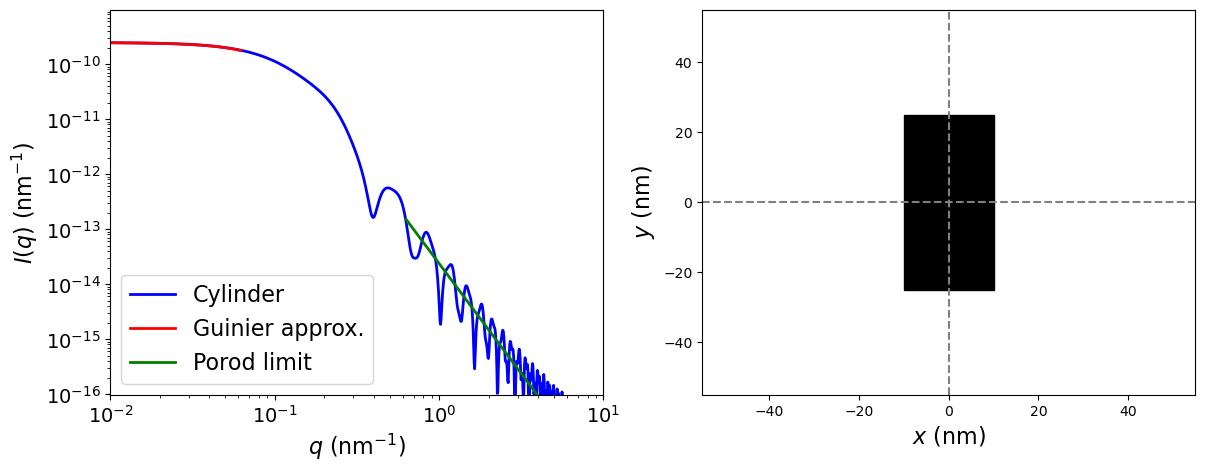

In [3]:
Dr=1e-4
n=1e-10

R=10
H=50

q = np.logspace(-2,1, num=1000, endpoint=True, base=10.0)
I = n*cyl.cylinder_int(q,Dr,R,H)
Rg = math.sqrt( R**2/2 + H**2/12 )
q_guinier = np.logspace(-3,math.log10(1/Rg), num=333, endpoint=True, base=10.0)
q_porod = np.logspace(math.log10(2*math.pi/R),1, num=333, endpoint=True, base=10.0)

Vol = math.pi*R**2*H
Sur = 2*math.pi*R*H + 2*math.pi*R**2

vol_frac = n*Vol
mean_squared_Dr = Dr**2 * vol_frac*(1-vol_frac)
Porod_factor = 2*np.pi*mean_squared_Dr * Sur/ Vol
    
# Initialize plot
fig, axs = plt.subplots(1,2,figsize=(fs*2,5))

axs[0].set_xlabel('$q$ (nm$^{-1}$)', fontsize=16)
axs[0].set_ylabel('$I(q)$ (nm$^{-1}$)', fontsize=16)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].minorticks_on()
axs[0].tick_params(axis='both', which='major', labelsize=14)
axs[0].set(xlim=(np.min(q),np.max(q)), ylim=(4*np.max(I)/1e7,4*np.max(I)))
axs[0].plot(q, I, color="blue", lw=2, label='Cylinder')
axs[0].plot(q_guinier, n*(Dr*Vol)**2*np.exp(-(q_guinier*Rg)**2/3), color="red", lw=2, label='Guinier approx.')   
axs[0].plot(q_porod, Porod_factor/q_porod**4, color="green", lw=2, label='Porod limit')   
axs[0].legend(fontsize=16)

# Draw Rectangle
axs[1].set_xlabel('$x$ (nm)', fontsize=16)
axs[1].set_ylabel('$y$ (nm)', fontsize=16)
c0 = plt.Rectangle((-R, -H/2.), 2*R, H, color='black', label='')
axs[1].add_patch(c0)
axs[1].axvline(x=0, ls='--', color='gray')
axs[1].axhline(y=0, ls='--', color='gray')

# Fill circle
#axs[0][1].set_facecolor(str(normalize(rs,rs,r0)))
axs[1].set(xlim=(-55,55), ylim=(-55,55))

plt.show()



## Rod-like objects

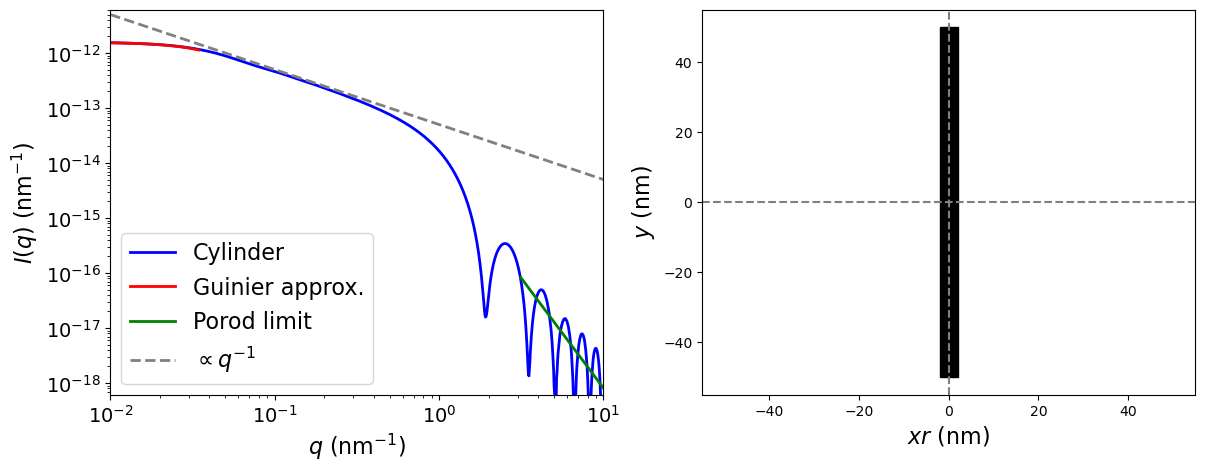

In [4]:
Dr=1e-4
n=1e-10

R=2
H=100

q = np.logspace(-2,1, num=1000, endpoint=True, base=10.0)
I = n*cyl.cylinder_int(q,Dr,R,H)
Rg = math.sqrt( R**2/2 + H**2/12 )
q_guinier = np.logspace(-3,math.log10(1/Rg), num=333, endpoint=True, base=10.0)
q_porod = np.logspace(math.log10(2*math.pi/R),1, num=333, endpoint=True, base=10.0)

Vol = math.pi*R**2*H
Sur = 2*math.pi*R*H + 2*math.pi*R**2

vol_frac = n*Vol
mean_squared_Dr = Dr**2 * vol_frac*(1-vol_frac)
Porod_factor = 2*np.pi*mean_squared_Dr * Sur/ Vol
    
# Initialize plot
fig, axs = plt.subplots(1,2,figsize=(fs*2,5))

axs[0].set_xlabel('$q$ (nm$^{-1}$)', fontsize=16)
axs[0].set_ylabel('$I(q)$ (nm$^{-1}$)', fontsize=16)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].minorticks_on()
axs[0].tick_params(axis='both', which='major', labelsize=14)
axs[0].set(xlim=(np.min(q),np.max(q)), ylim=(4*np.max(I)/1e7,4*np.max(I)))
axs[0].plot(q, I, color="blue", lw=2, label='Cylinder')
axs[0].plot(q_guinier, n*(Dr*Vol)**2*np.exp(-(q_guinier*Rg)**2/3), color="red", lw=2, label='Guinier approx.')   
axs[0].plot(q_porod, Porod_factor/q_porod**4, color="green", lw=2, label='Porod limit') 
axs[0].plot(q, 5e-14/q, color="gray", ls='--', lw=2, label='$\\propto q^{-1}$')
axs[0].legend(fontsize=16)


# Draw Rectangle
axs[1].set_xlabel('$xr$ (nm)', fontsize=16)
axs[1].set_ylabel('$y$ (nm)', fontsize=16)
c0 = plt.Rectangle((-R, -H/2.), 2*R, H, color='black', label='')
axs[1].add_patch(c0)
axs[1].axvline(x=0, ls='--', color='gray')
axs[1].axhline(y=0, ls='--', color='gray')

# Fill circle
#axs[0][1].set_facecolor(str(normalize(rs,rs,r0)))
axs[1].set(xlim=(-55,55), ylim=(-55,55))

plt.show()



## Disk-like objects

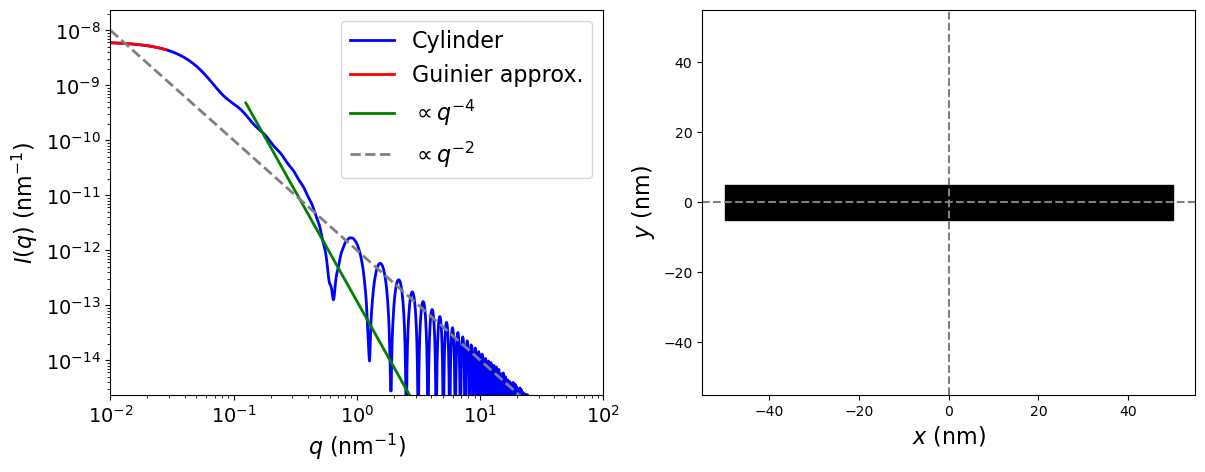

In [5]:
Dr=1e-4
n=1e-10

R=50
H=10

q = np.logspace(-2,2, num=1000, endpoint=True, base=10.0)
I = n*cyl.cylinder_int(q,Dr,R,H)
Rg = math.sqrt( R**2/2 + H**2/12 )
q_guinier = np.logspace(-3,math.log10(1/Rg), num=333, endpoint=True, base=10.0)
q_porod = np.logspace(math.log10(2*math.pi/R),1, num=333, endpoint=True, base=10.0)

Vol = math.pi*R**2*H
Sur = 2*math.pi*R*H + 2*math.pi*R**2

vol_frac = n*Vol
mean_squared_Dr = Dr**2 * vol_frac*(1-vol_frac)
Porod_factor = 2*np.pi*mean_squared_Dr * Sur/ Vol
    
# Initialize plot
fig, axs = plt.subplots(1,2,figsize=(fs*2,5))

axs[0].set_xlabel('$q$ (nm$^{-1}$)', fontsize=16)
axs[0].set_ylabel('$I(q)$ (nm$^{-1}$)', fontsize=16)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].minorticks_on()
axs[0].tick_params(axis='both', which='major', labelsize=14)
axs[0].set(xlim=(np.min(q),np.max(q)), ylim=(4*np.max(I)/1e7,4*np.max(I)))
axs[0].plot(q, I, color="blue", lw=2, label='Cylinder')
axs[0].plot(q_guinier, n*(Dr*Vol)**2*np.exp(-(q_guinier*Rg)**2/3), color="red", lw=2, label='Guinier approx.')   
axs[0].plot(q_porod, Porod_factor/q_porod**4, color="green", lw=2, label='$\\propto q^{-4}$')
axs[0].plot(q, 1e-12/q**2, color="gray", ls='--', lw=2, label='$\\propto q^{-2}$')
axs[0].legend(fontsize=16)

# Draw Rectangle
axs[1].set_xlabel('$x$ (nm)', fontsize=16)
axs[1].set_ylabel('$y$ (nm)', fontsize=16)
c0 = plt.Rectangle((-R, -H/2.), 2*R, H, color='black', label='')
axs[1].add_patch(c0)
axs[1].axvline(x=0, ls='--', color='gray')
axs[1].axhline(y=0, ls='--', color='gray')

# Fill circle
#axs[0][1].set_facecolor(str(normalize(rs,rs,r0)))
axs[1].set(xlim=(-55,55), ylim=(-55,55))

plt.show()



In [6]:
Dr=1e-4
n=1e-10

def interactive_shell_0( R=10, H=50 ):
    # define q range
    a0=-3
    a1=+2
    q = np.logspace(-2,2, num=500, endpoint=True, base=10.0)
    I = n*cyl.cylinder_int(q,Dr,R,H)
    Rg = math.sqrt( R**2/2 + H**2/12 )
    q_guinier = np.logspace(-3,math.log10(1/Rg), num=333, endpoint=True, base=10.0)
    Vol = math.pi*R**2*H
    Sur = 2*math.pi*R*H + 2*math.pi*R**2

    vol_frac = n*Vol
    mean_squared_Dr = Dr**2 * vol_frac*(1-vol_frac)
    Porod_factor = 2*np.pi*mean_squared_Dr * Sur/ Vol
    
    # Initialize plot
    fig, axs = plt.subplots(1,2,figsize=(fs*2,5))

    # Panel B: 1D form factor
    #axs[0].text(0.006, 3, r'B', fontsize=24)
    axs[0].set_xlabel('$q$ (nm$^{-1}$)', fontsize=16)
    axs[0].set_ylabel('$I(q)$ (nm$^{-1}$)', fontsize=16)
    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[0].minorticks_on()
    axs[0].tick_params(axis='both', which='major', labelsize=14)
    axs[0].set(xlim=(np.min(q),np.max(q)), ylim=(4*np.max(I)/1e7,4*np.max(I)))
    axs[0].plot(q, I , color="blue", label='Cylinder')
    axs[0].plot(q_guinier, n*(Dr*Vol)**2*np.exp(-(q_guinier*Rg)**2/3), color="red", label='Guinier approx.')   
    axs[0].plot(q, Porod_factor/q**4, color="green", label='$\\propto q^{-4}$') 
    axs[0].plot(q, np.max(I)/1e4/q**2, color="gray", ls='--', lw=2, label='$\\propto q^{-2}$')
    axs[0].plot(q, np.max(I)/1.5e1/q**1, color="gray", ls='-.', lw=2, label='$\\propto q^{-1}$')    
    axs[0].legend(fontsize=12)
    # recompute the ax.dataLim
    #axs[0].relim()
    # update ax.viewLim using the new dataLim
    #axs[0].autoscale_view()

    # Panel C: sphere in real space
    # axs[1].text(-60, 55, r'C', fontsize=24)
    # SLDs' color
    rs = 9.3 # x10^4 nm^-2
    r0 = 16.9 # x10^4 nm^-2
    # Draw Rectangle
    c0 = plt.Rectangle((-R, -H/2.), 2*R, H, color='black', label='')
    #c0 = plt.Circle((0, 0), radius=R, color=str(normalize(r0,rs,r0)), label='0')
    axs[1].add_patch(c0)
    # Fill circle
    axs[1].set_facecolor(str(normalize(rs,rs,r0)))
    axs[1].set(xlim=(-55,55), ylim=(-55,55))

    plt.show()

interact(interactive_shell_0,  R=(0.5, 50, 1),  H=(3, 100, 1))

interactive(children=(FloatSlider(value=10.0, description='R', max=50.0, min=0.5, step=1.0), IntSlider(value=5…

<function __main__.interactive_shell_0(R=10, H=50)>